In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("cleaned_final.csv")

In [2]:
pd.set_option('display.max_columns', None)
display(df.head())
df.shape

,PM10,SO2,CO,NO2,NOX,NO,O3,temp,feelslike,humidity,dew,windgust,windspeed,winddir,pressure,visibility,cloudcover,solarradiation,solarenergy,uvindex,hour,day,month,dayofweek,season,wind_dir_rad,wind_dir_sin,wind_dir_cos,weather_group_code,is_rainy,humidity_level,feelslike_diff,is_weekend,is_nighttime,is_rush_hour,humid_heat_index,uv_level
0,47.976,2.622,633.510,91.5125,123.564,44.600,4.0,10.0,10.0,87.38,8.0,16.6,9.4,250.0,1020.0,9.0,50.0,0.0,0.0,0.0,0,2,1,6,1,4.363323,-0.939693,-0.342020,0,0,2,0.0,1,1,0,873.80,0
1,50.498,2.786,537.026,90.1475,121.566,43.642,3.6,10.0,10.0,87.38,8.0,15.5,13.0,260.0,1021.0,10.0,50.0,0.0,0.0,0.0,1,2,1,6,1,4.537856,-0.984808,-0.173648,0,0,2,0.0,1,1,0,873.80,0
2,47.264,3.456,615.502,102.6875,119.832,39.820,3.4,10.0,10.0,87.38,8.0,15.8,13.0,260.0,1021.0,10.0,50.0,0.0,0.0,0.0,2,2,1,6,1,4.537856,-0.984808,-0.173648,0,0,2,0.0,1,1,0,873.80,0
3,46.026,3.260,693.612,82.3575,120.728,46.062,3.7,10.0,10.0,87.38,8.0,15.5,5.4,250.0,1021.0,10.0,50.0,0.0,0.0,0.0,3,2,1,6,1,4.363323,-0.939693,-0.342020,0,0,2,0.0,1,1,0,873.80,0
4,47.514,3.252,626.874,54.8325,97.116,41.600,4.0,9.0,9.0,93.45,8.0,14.4,0.0,0.0,1021.0,10.0,50.0,0.0,0.0,0.0,4,2,1,6,1,0.000000,0.000000,1.000000,0,0,2,0.0,1,1,0,841.05,0


(23782, 37)

In [ ]:
def evaluate_xgboost_nox(df, target='NOX'):
    from xgboost import XGBRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import (
        mean_absolute_error, mean_squared_error,
        median_absolute_error, mean_absolute_percentage_error,
        explained_variance_score, max_error, r2_score
    )
    import numpy as np

    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = XGBRegressor(random_state=42, verbosity=0)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    print(" XGBoost (Default) - NOX Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")


In [4]:
evaluate_xgboost_nox(df)

📌 XGBoost (Default) - NOX Tahmini:
Train MAE: 6.38 | Test MAE: 9.53
Train RMSE: 8.80 | Test RMSE: 13.74
MAPE (Test): 22.13%
Median AE (Test): 6.37
Explained Variance Score: 0.7257
Train R² Score: 0.8934 | Test R² Score: 0.7257
Max Error: 86.80


In [ ]:
def evaluate_rf_nox(df, target='NOX'):
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import (
        mean_absolute_error, mean_squared_error,
        median_absolute_error, mean_absolute_percentage_error,
        explained_variance_score, max_error, r2_score
    )
    import numpy as np

    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = RandomForestRegressor(random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    print(" Random Forest (Default) - NOX Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")


In [6]:
evaluate_rf_nox(df)

📌 Random Forest (Default) - NOX Tahmini:
Train MAE: 3.71 | Test MAE: 9.80
Train RMSE: 5.40 | Test RMSE: 14.08
MAPE (Test): 23.01%
Median AE (Test): 6.59
Explained Variance Score: 0.7123
Train R² Score: 0.9598 | Test R² Score: 0.7121
Max Error: 87.55


In [ ]:
def evaluate_lgbm_nox(df, target='NOX'):
    from lightgbm import LGBMRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import (
        mean_absolute_error, mean_squared_error,
        median_absolute_error, mean_absolute_percentage_error,
        explained_variance_score, max_error, r2_score
    )
    import numpy as np

    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = LGBMRegressor(random_state=42)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    print(" LightGBM (Default) - NOX Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")


In [8]:
evaluate_lgbm_nox(df)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001259 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2876
[LightGBM] [Info] Number of data points in the train set: 19025, number of used features: 28
[LightGBM] [Info] Start training from score 48.188644
📌 LightGBM (Default) - NOX Tahmini:
Train MAE: 9.25 | Test MAE: 10.35
Train RMSE: 12.72 | Test RMSE: 14.65
MAPE (Test): 24.46%
Median AE (Test): 7.16
Explained Variance Score: 0.6880
Train R² Score: 0.7773 | Test R² Score: 0.6880
Max Error: 83.79


e:\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Sistem belirtilen dosyayı bulamıyor
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "e:\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "e:\Anaconda\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\Anaconda\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "e:\Anaconda\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^

In [ ]:
def evaluate_catboost_nox(df, target='NOX'):
    from catboost import CatBoostRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import (
        mean_absolute_error, mean_squared_error,
        median_absolute_error, mean_absolute_percentage_error,
        explained_variance_score, max_error, r2_score
    )
    import numpy as np

    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = CatBoostRegressor(verbose=0, random_state=42)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    print(" CatBoost (Default) - NOX Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")


In [10]:
evaluate_catboost_nox(df)

📌 CatBoost (Default) - NOX Tahmini:
Train MAE: 7.70 | Test MAE: 9.37
Train RMSE: 10.67 | Test RMSE: 13.40
MAPE (Test): 21.87%
Median AE (Test): 6.33
Explained Variance Score: 0.7392
Train R² Score: 0.8432 | Test R² Score: 0.7392
Max Error: 88.25


In [ ]:
#-----------------------------------------HIPERPARAMETRE AYARI-------------------------------------------------------------

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, median_absolute_error,
    mean_absolute_percentage_error, explained_variance_score, max_error, r2_score
)
from sklearn.model_selection import train_test_split
import numpy as np

def evaluate_xgb_nox_manual(df, target='NOX'):
    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    
    model = XGBRegressor(
        n_estimators=700,
        max_depth=5,
        learning_rate=0.075,
        subsample=0.8,
        colsample_bytree=0.8,
        gamma=1,
        reg_alpha=7,
        reg_lambda=15,
        random_state=42
    )

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    print(" XGBoost (Optimize) - NOX Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")


In [16]:
evaluate_xgb_nox_manual(df)

📌 XGBoost (Optimize) - NOX Tahmini:
Train MAE: 6.98 | Test MAE: 9.27
Train RMSE: 9.74 | Test RMSE: 13.36
MAPE (Test): 21.54%
Median AE (Test): 6.22
Explained Variance Score: 0.7407
Train R² Score: 0.8695 | Test R² Score: 0.7407
Max Error: 82.29


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, median_absolute_error,
    mean_absolute_percentage_error, explained_variance_score,
    max_error, r2_score
)
from sklearn.model_selection import train_test_split
import numpy as np

def evaluate_rf_nox_manual(df, target='NOX'):
    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    
    model = RandomForestRegressor(
        n_estimators=500,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=10,
        max_features='sqrt',
        random_state=42,
        n_jobs=-1
    )

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #  Metrikler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    
    print(" Random Forest (Manuel Optimize) - NOX Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")


In [19]:
evaluate_rf_nox_manual(df)

📌 Random Forest (Manuel Optimize) - NOX Tahmini:
Train MAE: 9.90 | Test MAE: 11.35
Train RMSE: 13.85 | Test RMSE: 15.82
MAPE (Test): 27.95%
Median AE (Test): 7.90
Explained Variance Score: 0.6364
Train R² Score: 0.7357 | Test R² Score: 0.6364
Max Error: 84.99


In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    median_absolute_error, mean_absolute_percentage_error,
    explained_variance_score, max_error
)
import numpy as np

def evaluate_lgbm_nox_manual(df, target='NOX'):
    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    
    model = LGBMRegressor(
        n_estimators=900,
        max_depth=10,
        learning_rate=0.02,
        num_leaves=70,
        min_child_samples=10,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=7,
        reg_lambda=12,
        random_state=42
    )

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    print(f" LightGBM (Optimize) NOX Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")


In [21]:
evaluate_lgbm_nox_manual(df)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001452 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2876
[LightGBM] [Info] Number of data points in the train set: 19025, number of used features: 28
[LightGBM] [Info] Start training from score 48.188644
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
📌 LightGBM (Optimize) NOX Tahmini:
Train MAE: 6.56 | Test MAE: 9.10
Train RMSE: 9.04 | Test RMSE: 13.13
MAPE (Test): 21.05%
Median AE (Test): 6.14
Explained Variance Score: 0.7495
Train R² Score: 0.8873 | Test R² Score: 0.7495
Max Error: 86.78


In [ ]:
def evaluate_catboost_nox(df, target='NOX'):
    from catboost import CatBoostRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import (
        mean_absolute_error, mean_squared_error,
        median_absolute_error, mean_absolute_percentage_error,
        explained_variance_score, max_error, r2_score
    )
    import numpy as np
    import pickle

    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = CatBoostRegressor(
        iterations=600,
        learning_rate=0.08,
        depth=10,
        l2_leaf_reg=15,
        verbose=0,
        random_state=42
    )

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    print(" CatBoost (Optimize) - NOX Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")

#     model_data = {
#       "model": model,
#       "mae": mae_test,
#       "features": X.columns.tolist()
#    }

#     with open("nox_model.pkl", "wb") as f:
#        pickle.dump(model_data, f)

In [28]:
evaluate_catboost_nox(df)

📌 CatBoost (Optimize) - NOX Tahmini:
Train MAE: 5.88 | Test MAE: 8.67
Train RMSE: 8.14 | Test RMSE: 12.58
MAPE (Test): 20.02%
Median AE (Test): 5.91
Explained Variance Score: 0.7699
Train R² Score: 0.9087 | Test R² Score: 0.7699
Max Error: 82.20


In [ ]:
def evaluate_catboost_nox(df, target='NOX'):
    from catboost import CatBoostRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import (
        mean_absolute_error, mean_squared_error,
        median_absolute_error, mean_absolute_percentage_error,
        explained_variance_score, max_error, r2_score
    )
    import numpy as np
    import pickle

    selected_features = [
        'temp', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'weather_group_code',

        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'is_weekend', 'is_nighttime', 'is_rush_hour'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = CatBoostRegressor(
        iterations=850,
        learning_rate=0.15,
        depth=10,
        l2_leaf_reg=10,
        verbose=0,
        random_state=42
    )

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    percentiles = np.percentile(y_test_pred, [25, 50, 75])
    p25, p50, p75 = percentiles
    print("\nPM10 Tahmin Percentile Eşikleri:")
    print(f"Yeşil (İyi):     0 – {p25:.2f}")
    print(f"Sarı (Orta):     {p25:.2f} – {p50:.2f}")
    print(f"Turuncu (Kötü):  {p50:.2f} – {p75:.2f}")
    print(f"Kırmızı (Çok Kötü): {p75:.2f} ve üzeri")

    print(" CatBoost (Optimize) - NOX Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")

    import matplotlib.pyplot as plt
    import seaborn as sns

    sns.set(style="whitegrid")

    plt.figure(figsize=(5, 4))
    plt.scatter(y_test, y_test_pred, alpha=0.6, s=30, color='#2c7fb8', edgecolor='black', linewidth=0.5, label="Predictions")
    plt.plot([0, 150], [0, 150], 'r--', linewidth=1.5, label='y = x')
    plt.xlim(0, 150)
    plt.ylim(0, 150)
    plt.xlabel("Actual NOX Value", fontsize=12)
    plt.ylabel("Predicted NOX Value", fontsize=12)
    plt.title("Prediction Error Plot", fontsize=13)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend(frameon=True, loc='upper left', fontsize=10)

    sns.despine()

    plt.tight_layout()
    plt.show()

    #Feature Importance 
    importances = model.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': selected_features,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False).head(5)

    plt.figure(figsize=(8, 5))
    sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
    plt.title("NOX - Feature Importance", fontsize=13)
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.grid(True, axis='x', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    model_data = {
       "model": model,
       "mae": mae_test,
       "features": X.columns.tolist()
     }

    with open("nox_model.pkl", "wb") as f:
         pickle.dump(model_data, f)


PM10 Tahmin Percentile Eşikleri:
Yeşil (İyi):     0 – 29.06
Sarı (Orta):     29.06 – 42.55
Turuncu (Kötü):  42.55 – 61.42
Kırmızı (Çok Kötü): 61.42 ve üzeri
 CatBoost (Optimize) - NOX Tahmini:
Train MAE: 3.10 | Test MAE: 7.95
Train RMSE: 4.26 | Test RMSE: 11.76
MAPE (Test): 18.12%
Median AE (Test): 5.19
Explained Variance Score: 0.7990
Train R² Score: 0.9750 | Test R² Score: 0.7990
Max Error: 78.75


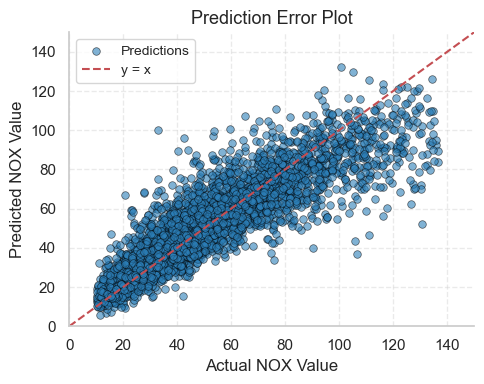

C:\Users\emin8\AppData\Local\Temp\ipykernel_14396\811245335.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


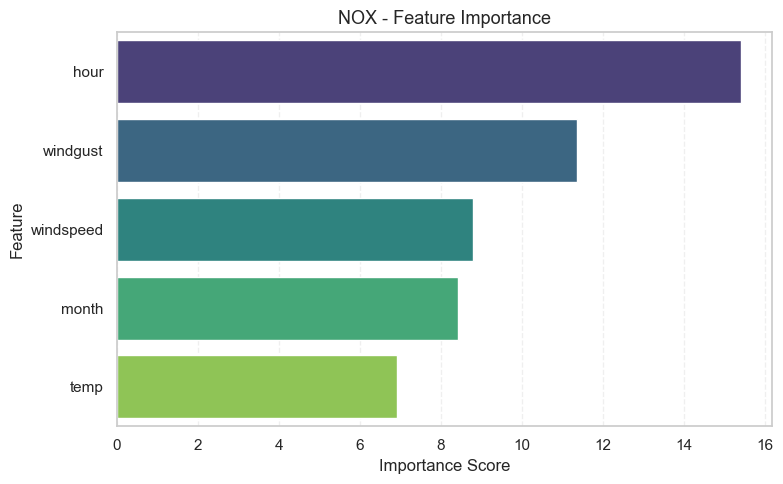

In [3]:
evaluate_catboost_nox(df)

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error,
    median_absolute_error, mean_absolute_percentage_error,
    explained_variance_score, max_error, r2_score
)
import numpy as np

def evaluate_catboost_nox_cv(df, target='NOX'):
    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Metirk saklama yapısı
    metric_results = {
        "mae_train": [], "mae_test": [],
        "rmse_train": [], "rmse_test": [],
        "r2_train": [], "r2_test": [],
        "mape": [], "medae": [],
        "evs": [], "max_error": []
    }

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = CatBoostRegressor(
            iterations=600,
            learning_rate=0.08,
            depth=10,
            l2_leaf_reg=15,
            verbose=0,
            random_state=42
        )
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

    
        metric_results["mae_train"].append(mean_absolute_error(y_train, y_train_pred))
        metric_results["mae_test"].append(mean_absolute_error(y_test, y_test_pred))
        metric_results["rmse_train"].append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        metric_results["rmse_test"].append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
        metric_results["r2_train"].append(r2_score(y_train, y_train_pred))
        metric_results["r2_test"].append(r2_score(y_test, y_test_pred))
        metric_results["mape"].append(mean_absolute_percentage_error(y_test, y_test_pred))
        metric_results["medae"].append(median_absolute_error(y_test, y_test_pred))
        metric_results["evs"].append(explained_variance_score(y_test, y_test_pred))
        metric_results["max_error"].append(max_error(y_test, y_test_pred))

    print("CatBoost (Optimize + CV) - NOX Tahmini (5-Fold):")
    for key, values in metric_results.items():
        print(f"{key.replace('_', ' ').title()} (mean): {np.mean(values):.2f}")


In [4]:
evaluate_catboost_nox_cv(df)

CatBoost (Optimize + CV) - NOX Tahmini (5-Fold):
Mae Train (mean): 5.92
Mae Test (mean): 8.85
Rmse Train (mean): 8.22
Rmse Test (mean): 12.78
R2 Train (mean): 0.91
R2 Test (mean): 0.77
Mape (mean): 0.20
Medae (mean): 5.90
Evs (mean): 0.77
Max Error (mean): 82.00
